# Data Colecting 

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn import tree

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle


In [104]:
df = pd.read_csv('../Data/ObesityDataSet_raw_and_data_sinthetic.csv')
df = df.drop(columns=['MTRANS'], errors='ignore')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Overweight_Level_II


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [106]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [107]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [108]:
df['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [109]:
df['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [110]:
# df['MTRANS'].unique()

# Data Pre Processing & EDA

In [111]:
le = LabelEncoder()

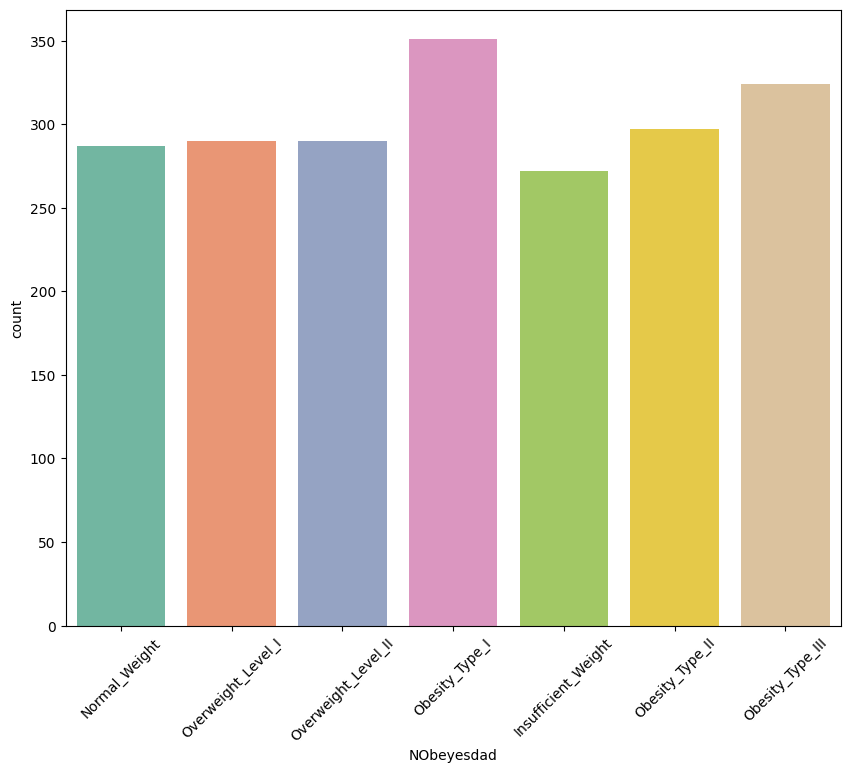

In [112]:
# plotting the result column
plt.figure(figsize = (10,8))
sns.countplot(df, x="NObeyesdad", palette='Set2')
plt.xticks(rotation=45)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

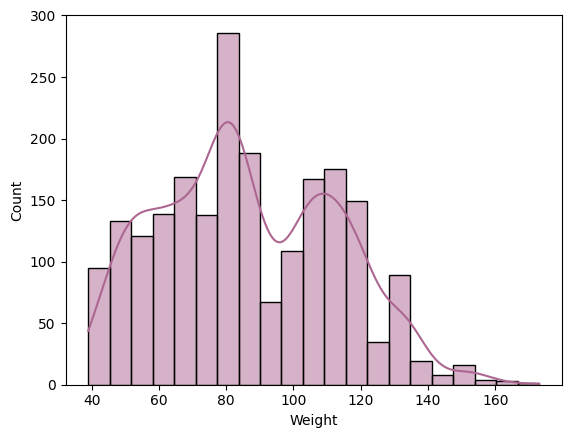

In [113]:
sns.histplot(df, x="Weight", kde=True, color="#ac6691")
plt.xlabel('Weight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

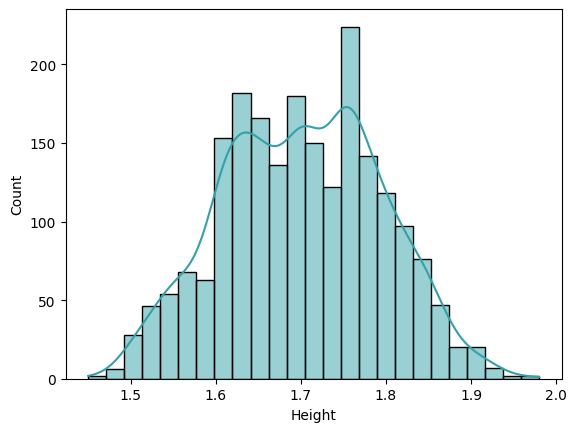

In [114]:
sns.histplot(df, x="Height", kde=True, color="#32a2a8")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

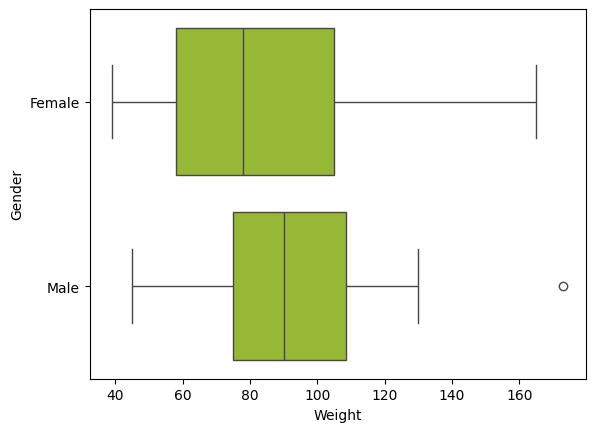

In [115]:
sns.boxplot(df, x="Weight", y="Gender", color="#a1cc22")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

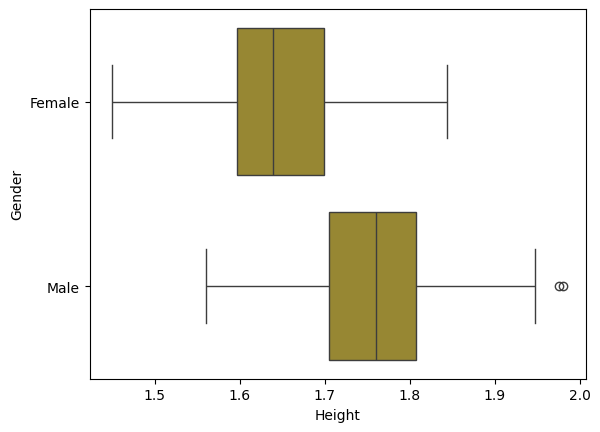

In [116]:
sns.boxplot(df, x="Height", y="Gender", color="#a89322")
plt.show

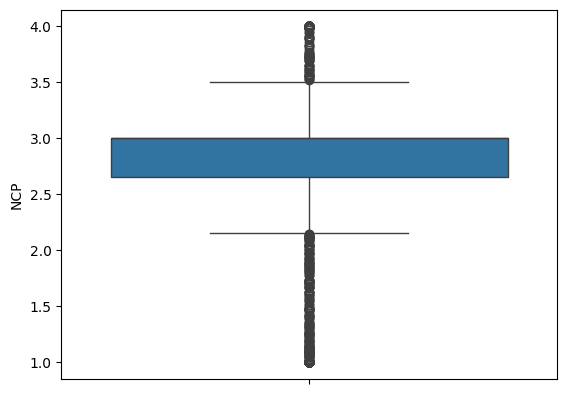

In [117]:
sns.boxplot(df["NCP"],)
plt.show()

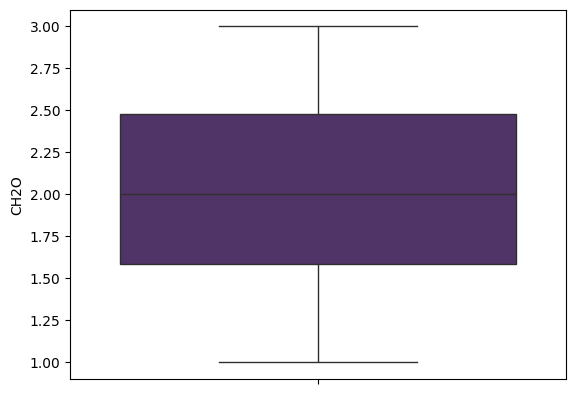

In [118]:
sns.boxplot(df["CH2O"], color='#512b70')
plt.show()

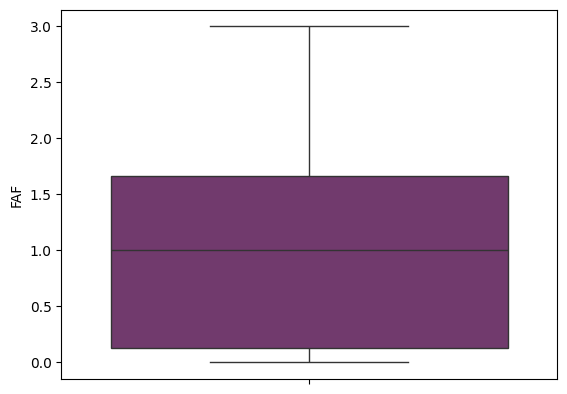

In [119]:
sns.boxplot(df["FAF"], color='#7a3175')
plt.show()

# Dataset Splitting

In [120]:
# dividing the data into features and targets
X = df.drop(["NObeyesdad"], axis=True)
y = df["NObeyesdad"]
features_names = X.columns
target_names = df["NObeyesdad"].unique()


In [121]:
label_encoders = {}
for column in X.columns:
    if X[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])

In [122]:
X.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.505921,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000
50%,1.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000


In [123]:
# Splitting data for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)

In [124]:
X_train.shape

(1414, 15)

In [125]:
X_train.dtypes

Gender                              int32
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int32
FAVC                                int32
FCVC                              float64
NCP                               float64
CAEC                                int32
SMOKE                               int32
CH2O                              float64
SCC                                 int32
FAF                               float64
TUE                               float64
CALC                                int32
dtype: object

In [126]:
X_test.shape

(697, 15)

In [127]:
dt_clf = DecisionTreeClassifier(random_state=0)

In [128]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [129]:
# Melatih model dengan data latih 
pred_train = dt_clf.predict(X_train)

In [130]:
# Menguji akurasi model dengan data latih 
dt_clf_train_score = accuracy_score(pred_train, y_train) * 100 
dt_clf_train_score

100.0

In [131]:
# Menguji model dengan data uji 
pred_test = dt_clf.predict(X_test)

In [132]:
# Menguji akurasi model dengan data uji 
dt_clf_test_score = accuracy_score(pred_test, y_test) * 100 
dt_clf_test_score

93.4002869440459

In [133]:
# checking for the best parameters such that performance can be increased
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [42]
}

clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
clf_dt.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", clf_dt.best_params_)

# Evaluate the model with the best hyperparameters on the test set
best_clf = clf_dt.best_estimator_
dt_train_accuracy = best_clf.score(X_train, y_train)
dt_test_accuracy = best_clf.score(X_test, y_test)

print(f"Train Accuracy with Best Hyperparameters: {dt_train_accuracy}")
print(f"Test Accuracy with Best Hyperparameters: {dt_test_accuracy}")


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42}
Train Accuracy with Best Hyperparameters: 0.963932107496464
Test Accuracy with Best Hyperparameters: 0.8393113342898135


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
450 fits failed out of a total of 1350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
450 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py

In [134]:
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, random_state=42) 
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, max_features='sqrt',
                       random_state=42)

In [135]:
# Melatih model dengan set latih 
pred_train = clf_dt.predict(X_train)

In [136]:
# Menguji akurasi model dengan set latih 
dt_train_accuracy = accuracy_score(pred_train, y_train) * 100 
dt_train_accuracy

100.0

In [137]:
# Testing the model with test data
pred_test = clf_dt.predict(X_test)


In [138]:
# Testing the accuracy of the model
dt_test_accuracy = accuracy_score(pred_test, y_test) * 100
dt_test_accuracy

82.49641319942612

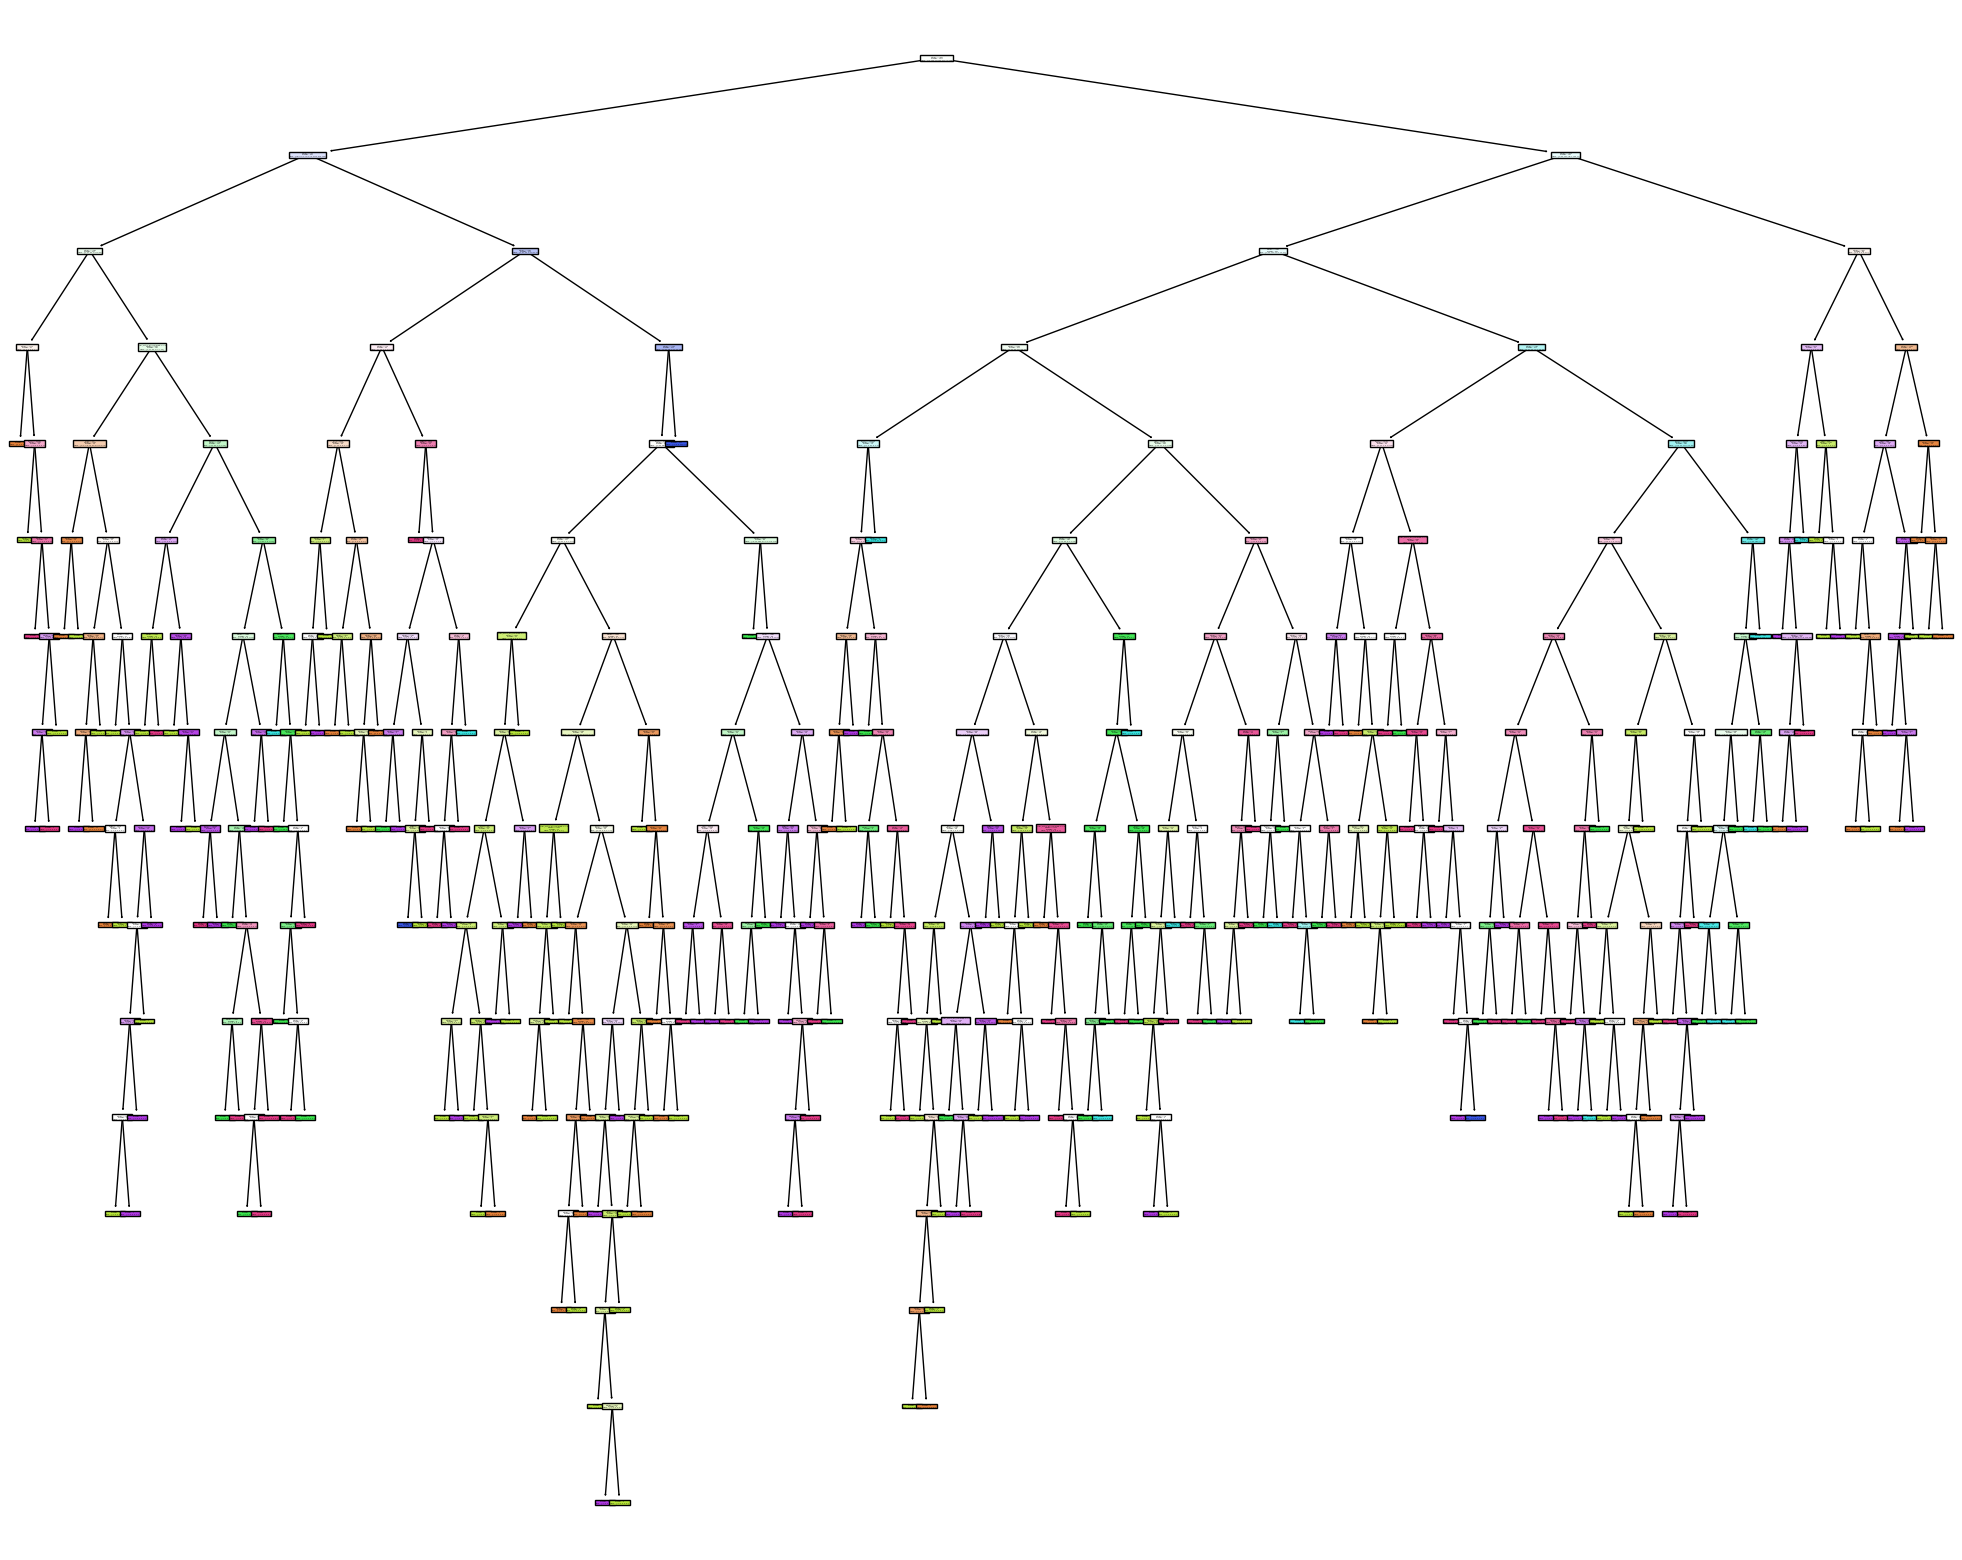

In [139]:
# plotting the decision tree for the prediction
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf_dt,
                   feature_names=features_names,
                   filled=True)


In [140]:
# saving the decision tree as a png
fig.savefig("decision_tree.png")

In [141]:
# classification report
y_pred = clf_dt.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.88      0.86        97
      Normal_Weight       0.70      0.68      0.69        94
     Obesity_Type_I       0.83      0.84      0.83       117
    Obesity_Type_II       0.94      0.93      0.93        97
   Obesity_Type_III       0.98      1.00      0.99       110
 Overweight_Level_I       0.73      0.69      0.71        90
Overweight_Level_II       0.70      0.72      0.71        92

           accuracy                           0.82       697
          macro avg       0.82      0.82      0.82       697
       weighted avg       0.82      0.82      0.82       697



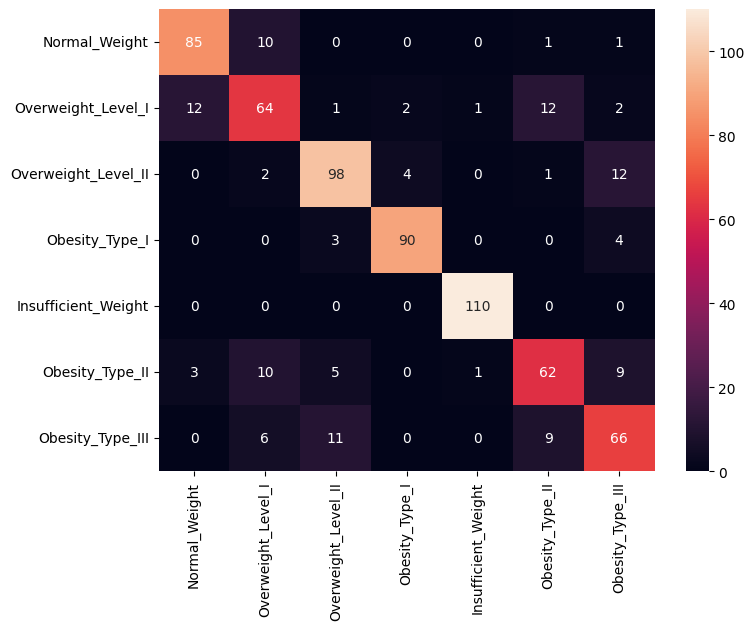

In [142]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,6))
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.show()

# ROC/AUC Curve 

In [143]:
# RocCurveDisplay.from_estimator(clf_dt, X_test, y_test)
# plt.show()

# Random Forest 

In [144]:
# Initializing the Random Forest classifier 
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [145]:
# Fitting the classifier with training sets 
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [146]:
# Training the model on the training set 
pred_train = rfc.predict(X_train)

In [147]:
# Accuracy score of the training set 
rfc_train_score = accuracy_score(pred_train, y_train) * 100 
rfc_train_score

100.0

In [148]:
# Training the model on the testing set 
pred_test = rfc.predict(X_test)

In [149]:
# Accuracy score on the testing set 
rfc_test_score = accuracy_score(pred_test, y_test) * 100 
rfc_test_score

94.69153515064562

In [150]:
# Defining the parameter grid
rfc_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['log2'],
    'random_state': [42],
    'criterion': ['gini', 'entropy', 'log_loss']
}

# Initializing GridSearchCV
rfc_grid = GridSearchCV(RandomForestClassifier(), rfc_param_grid, cv=5)

# Fitting GridSearchCV with the training data
rfc_grid.fit(X_train, y_train)

# Extracting the best parameters and score
rfc_best_params = rfc_grid.best_params_
rfc_best_score = rfc_grid.best_score_

print("RandomForestClassifier best parameter:", rfc_best_params)
print("RandomForestClassifier best score:", rfc_best_score)

# Initializing RandomForestClassifier with the best parameters
rfc = RandomForestClassifier(n_estimators=200, max_features='log2', criterion='gini', random_state=42)
rfc.fit(X_train, y_train)

# Predicting the training set
rfc_train = rfc_grid.predict(X_train)


RandomForestClassifier best parameter: {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 100, 'random_state': 42}
RandomForestClassifier best score: 0.9505024684860788


In [151]:
rfc = RandomForestClassifier(n_estimators=200, max_features='log2', criterion='gini', random_state=42)

In [152]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features='log2', n_estimators=200, random_state=42)

In [153]:
# Predicting on the training set
pred_train = rfc_grid.predict(X_train)

In [154]:
# Calculating the accuracy on the training set
rfc_train_accuracy = accuracy_score(pred_train, y_train) * 100
dt_train_accuracy

100.0

In [155]:
# Predicting on the test set
pred_test = rfc_grid.predict(X_test)

In [156]:
# Calculating the accuracy on the test set
rfc_test_accuracy = accuracy_score(pred_test, y_test) * 100
dt_test_accuracy


82.49641319942612

In [157]:
# Classification report
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.99      0.93      0.96        97
      Normal_Weight       0.83      0.98      0.90        94
     Obesity_Type_I       0.98      0.97      0.98       117
    Obesity_Type_II       0.99      1.00      0.99        97
   Obesity_Type_III       1.00      1.00      1.00       110
 Overweight_Level_I       0.98      0.89      0.93        90
Overweight_Level_II       0.96      0.92      0.94        92

           accuracy                           0.96       697
          macro avg       0.96      0.96      0.96       697
       weighted avg       0.96      0.96      0.96       697



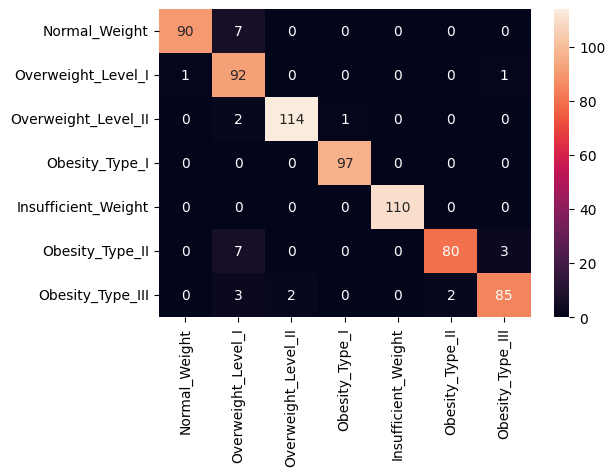

In [158]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
ax=sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.show()

<Axes: >

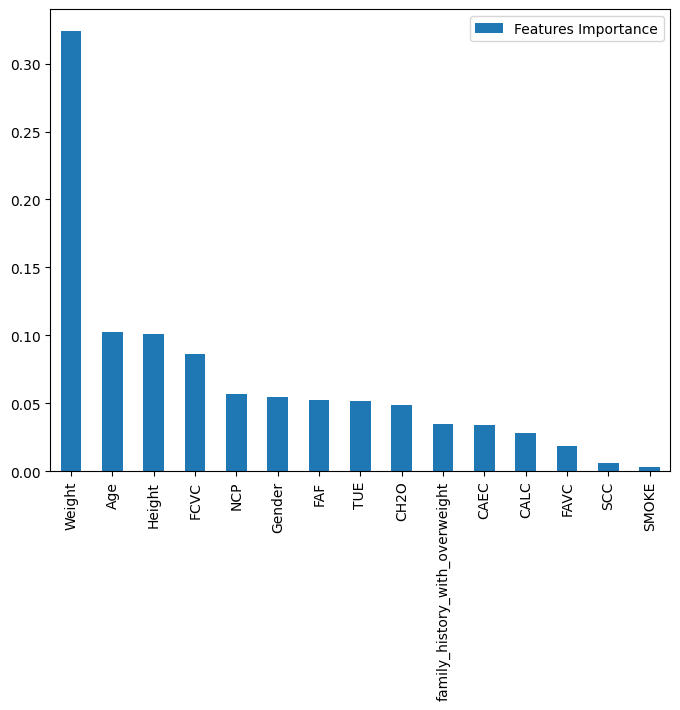

In [159]:
# Plotting the featues importance
feat_importance = pd.DataFrame(rfc.feature_importances_, index=features_names, columns=["Features Importance"])
feat_importance.sort_values(by='Features Importance', ascending=False, inplace=True)
feat_importance.plot(kind='bar', figsize=(8,6))

# SVM

In [160]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train,y_train)

SVC(random_state=42)

In [161]:
pred_train = clf_svm.predict(X_train)

In [162]:
# Calculating the training accuracy
svm_train_score = accuracy_score(pred_train, y_train) * 100
print(f"Training Accuracy: {svm_train_score}")

Training Accuracy: 58.415841584158414


In [163]:
# Making predictions on the test set
pred_test = clf_svm.predict(X_test)

In [164]:
# Calculating the test accuracy
svm_test_score = accuracy_score(pred_test, y_test) * 100
print(f"Test Accuracy: {svm_test_score}")

Test Accuracy: 60.258249641319935


In [165]:
# Defining the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'probability': [True, False]
}

# Initializing GridSearchCV
best_svm = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy')

# Fitting the model with the training data
best_svm.fit(X_train, y_train)

# Printing the best hyperparameters
print("Best Hyperparameters are:", best_svm.best_params_)

# Evaluating the model with the best hyperparameters on the test set
train_accuracy = best_svm.score(X_train, y_train)
test_accuracy = best_svm.score(X_test, y_test)
print(f"Train Accuracy with Best Hyperparameters: {train_accuracy}")
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy}")

Best Hyperparameters are: {'C': 10, 'coef0': 0.0, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'shrinking': True}
Train Accuracy with Best Hyperparameters: 0.9985855728429985
Test Accuracy with Best Hyperparameters: 0.9225251076040172


In [166]:
clf_svm = SVC(C=10, gamma='auto', kernel='rbf', coef0=0.0, probability=True, random_state=42, shrinking=True)
clf_svm.fit(X_train, y_train)

SVC(C=10, gamma='auto', probability=True, random_state=42)

In [167]:
pred_train = clf_svm.predict(X_train)

In [168]:
svm_train_accuracy = accuracy_score(pred_train, y_train) * 100
svm_train_accuracy

99.85855728429985

In [169]:
pred_test = clf_svm.predict(X_test)

In [170]:
svm_test_accuracy = accuracy_score(pred_test, y_test) * 100
svm_test_accuracy

92.25251076040172

In [171]:
# classification report
y_pred = clf_svm.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.96      0.93        97
      Normal_Weight       0.86      0.73      0.79        94
     Obesity_Type_I       0.94      0.96      0.95       117
    Obesity_Type_II       1.00      0.99      0.99        97
   Obesity_Type_III       0.99      1.00      1.00       110
 Overweight_Level_I       0.85      0.87      0.86        90
Overweight_Level_II       0.88      0.92      0.90        92

           accuracy                           0.92       697
          macro avg       0.92      0.92      0.92       697
       weighted avg       0.92      0.92      0.92       697



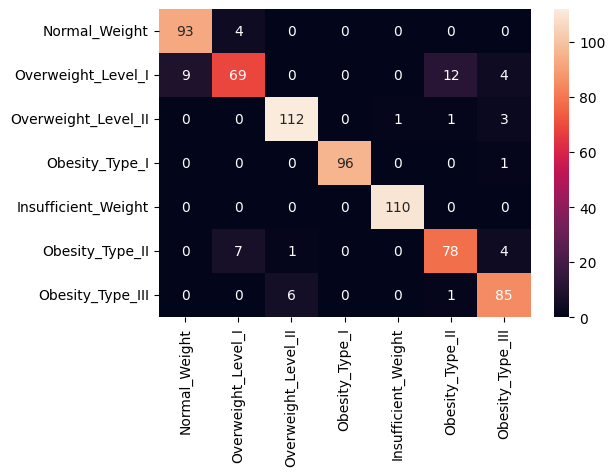

In [172]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
ax=sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.show()

# Gradient Boosting

In [173]:
gb_clf = GradientBoostingClassifier(n_estimators=100)

In [174]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [175]:
pred_train = gb_clf.predict(X_train)

In [176]:
gb_clf_train_score = accuracy_score(pred_train, y_train) * 100
gb_clf_train_score

100.0

In [177]:
pred_test = gb_clf.predict(X_test)

gb_clf_test_score = accuracy_score(pred_test, y_test) * 100
gb_clf_test_score

95.98278335724534

In [178]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

best_gb = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=3, scoring='accuracy')
best_gb.fit(X_train, y_train)
print("Best Hyperparameters are:", best_gb.best_params_)

# Evaluate the model with the best hyperparameters on the test set
train_accuracy = best_gb.score(X_train, y_train)
test_accuracy = best_gb.score(X_test, y_test)
print(f"Train Accuracy with Best Hyperparameters: {train_accuracy}")
print(f"Test Accuracy with Best Hyperparameters: {test_accuracy}")


Best Hyperparameters are: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Train Accuracy with Best Hyperparameters: 1.0
Test Accuracy with Best Hyperparameters: 0.9684361549497847


In [179]:
clf_gb = GradientBoostingClassifier(learning_rate=0.5, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200)
clf_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, min_samples_leaf=2,
                           n_estimators=200)

In [180]:
pred_train = clf_gb.predict(X_train)

In [181]:
gb_train_accuracy = accuracy_score(pred_train, y_train)
gb_train_accuracy

1.0

In [182]:
pred_test = clf_gb.predict(X_test)

gb_test_accuracy = accuracy_score(pred_test, y_test)
gb_test_accuracy

0.9770444763271162

In [183]:
# classification report
y_pred = clf_gb.predict(X_test)
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.97      0.97        97
      Normal_Weight       0.95      0.95      0.95        94
     Obesity_Type_I       0.97      0.99      0.98       117
    Obesity_Type_II       0.98      1.00      0.99        97
   Obesity_Type_III       1.00      0.99      1.00       110
 Overweight_Level_I       0.97      0.97      0.97        90
Overweight_Level_II       0.99      0.97      0.98        92

           accuracy                           0.98       697
          macro avg       0.98      0.98      0.98       697
       weighted avg       0.98      0.98      0.98       697



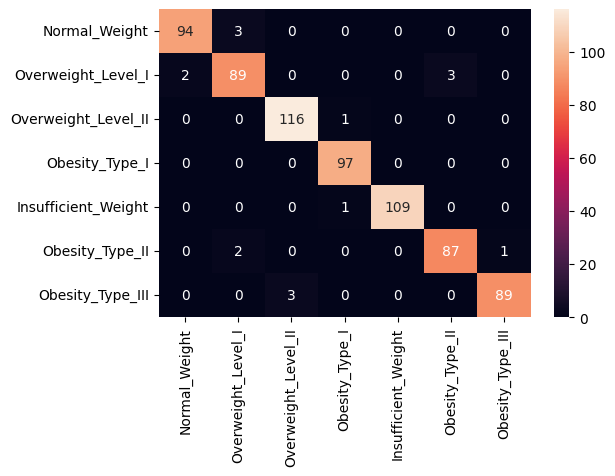

In [184]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names)
plt.show()

# Scores

In [185]:
scores_data = {
    'Model': ['Decision Tree', 'Random Forest', 'SVC', 'Gradient Boosting'],
    'Train Score': [dt_clf_train_score, rfc_train_score, svm_train_score, gb_clf_train_score],
    'Test Score': [dt_clf_test_score, rfc_test_score, svm_test_score, gb_clf_test_score],
    'Tuned Train Score': [dt_train_accuracy, rfc_train_accuracy, svm_train_accuracy, gb_train_accuracy],
    'Tuned Test Score': [dt_test_accuracy, rfc_test_accuracy, svm_test_accuracy, gb_test_accuracy]
}

# Create DataFrame
scores_df = pd.DataFrame(scores_data)

# Sort the DataFrame by 'Tuned Test Score'
sorted_scores_df = scores_df.sort_values(by='Tuned Test Score', ascending=False)

# Display the sorted DataFrame
sorted_scores_df


,Model,Train Score,Test Score,Tuned Train Score,Tuned Test Score
1,Random Forest,100.000000,94.691535,100.000000,95.265423
2,SVC,58.415842,60.258250,99.858557,92.252511
0,Decision Tree,100.000000,93.400287,100.000000,82.496413
3,Gradient Boosting,100.000000,95.982783,1.000000,0.977044


# Models

In [189]:
# Save the best model to a file
with open('models/obesity_model.pkl', 'wb') as model_file:
    pickle.dump(clf_svm, model_file)

# Example test input based on your features
test_input = np.array([
    [1, 30, 175, 70, 0, 1, 1, 3, 1, 0, 2.5, 2, 3, 1, 1500]  # Example values
], dtype=np.float64)

# Define the feature names as used in the model training
columns = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 
           'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC']

# Convert the numpy array to a DataFrame with the correct feature names
test_input_df = pd.DataFrame(test_input, columns=columns)

# Load the saved model
with open('models/obesity_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Predict using the loaded model
prediction = loaded_model.predict(test_input_df)
print(prediction)

['Normal_Weight']
